In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

1.10.1


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

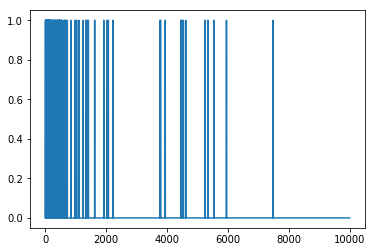

In [4]:
plt.plot(train_data[0])

In [5]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works. 
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [6]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.4752 - acc: 0.8083 - binary_crossentropy: 0.4752 - val_loss: 0.3332 - val_acc: 0.8740 - val_binary_crossentropy: 0.3332
Epoch 2/20
 - 5s - loss: 0.2463 - acc: 0.9116 - binary_crossentropy: 0.2463 - val_loss: 0.2838 - val_acc: 0.8866 - val_binary_crossentropy: 0.2838
Epoch 3/20
 - 3s - loss: 0.1801 - acc: 0.9372 - binary_crossentropy: 0.1801 - val_loss: 0.2902 - val_acc: 0.8843 - val_binary_crossentropy: 0.2902
Epoch 4/20
 - 3s - loss: 0.1435 - acc: 0.9512 - binary_crossentropy: 0.1435 - val_loss: 0.3180 - val_acc: 0.8782 - val_binary_crossentropy: 0.3180
Epoch 5/20
 - 2s - loss: 0.1180 - acc: 0.9614 - binary_crossentropy: 0.1180 - val_loss: 0.3461 - val_acc: 0.8740 - val_binary_crossentropy: 0.3461
Epoch 6/20
 - 2s - loss: 0.0946 - acc: 0.9709 - binary_crossentropy: 0.0946 - val_loss: 0.3819 - val_acc: 0.8685 - val_binary_crossentropy: 0.3819
Epoch 7/20
 - 2s - loss: 0.0747 - acc: 0.9798 - binary_crossentropy:

In [7]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [8]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.5386 - acc: 0.7668 - binary_crossentropy: 0.5386 - val_loss: 0.4214 - val_acc: 0.8588 - val_binary_crossentropy: 0.4214
Epoch 2/20
 - 3s - loss: 0.3302 - acc: 0.8958 - binary_crossentropy: 0.3302 - val_loss: 0.3253 - val_acc: 0.8809 - val_binary_crossentropy: 0.3253
Epoch 3/20
 - 2s - loss: 0.2462 - acc: 0.9204 - binary_crossentropy: 0.2462 - val_loss: 0.2928 - val_acc: 0.8874 - val_binary_crossentropy: 0.2928
Epoch 4/20
 - 2s - loss: 0.2011 - acc: 0.9352 - binary_crossentropy: 0.2011 - val_loss: 0.2865 - val_acc: 0.8864 - val_binary_crossentropy: 0.2865
Epoch 5/20
 - 2s - loss: 0.1721 - acc: 0.9453 - binary_crossentropy: 0.1721 - val_loss: 0.2908 - val_acc: 0.8830 - val_binary_crossentropy: 0.2908
Epoch 6/20
 - 2s - loss: 0.1501 - acc: 0.9522 - binary_crossentropy: 0.1501 - val_loss: 0.2963 - val_acc: 0.8828 - val_binary_crossentropy: 0.2963
Epoch 7/20
 - 2s - loss: 0.1326 - acc: 0.9600 - binary_crossentropy:

In [9]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [10]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 10s - loss: 0.3460 - acc: 0.8538 - binary_crossentropy: 0.3460 - val_loss: 0.3044 - val_acc: 0.8760 - val_binary_crossentropy: 0.3044
Epoch 2/20
 - 8s - loss: 0.1341 - acc: 0.9516 - binary_crossentropy: 0.1341 - val_loss: 0.3690 - val_acc: 0.8622 - val_binary_crossentropy: 0.3690
Epoch 3/20
 - 9s - loss: 0.0411 - acc: 0.9889 - binary_crossentropy: 0.0411 - val_loss: 0.4399 - val_acc: 0.8692 - val_binary_crossentropy: 0.4399
Epoch 4/20
 - 11s - loss: 0.0068 - acc: 0.9992 - binary_crossentropy: 0.0068 - val_loss: 0.6050 - val_acc: 0.8695 - val_binary_crossentropy: 0.6050
Epoch 5/20
 - 9s - loss: 8.0297e-04 - acc: 1.0000 - binary_crossentropy: 8.0297e-04 - val_loss: 0.6702 - val_acc: 0.8732 - val_binary_crossentropy: 0.6702
Epoch 6/20
 - 8s - loss: 2.2963e-04 - acc: 1.0000 - binary_crossentropy: 2.2963e-04 - val_loss: 0.7099 - val_acc: 0.8729 - val_binary_crossentropy: 0.7099
Epoch 7/20
 - 8s - loss: 1.4308e-04 - acc: 1.0000 

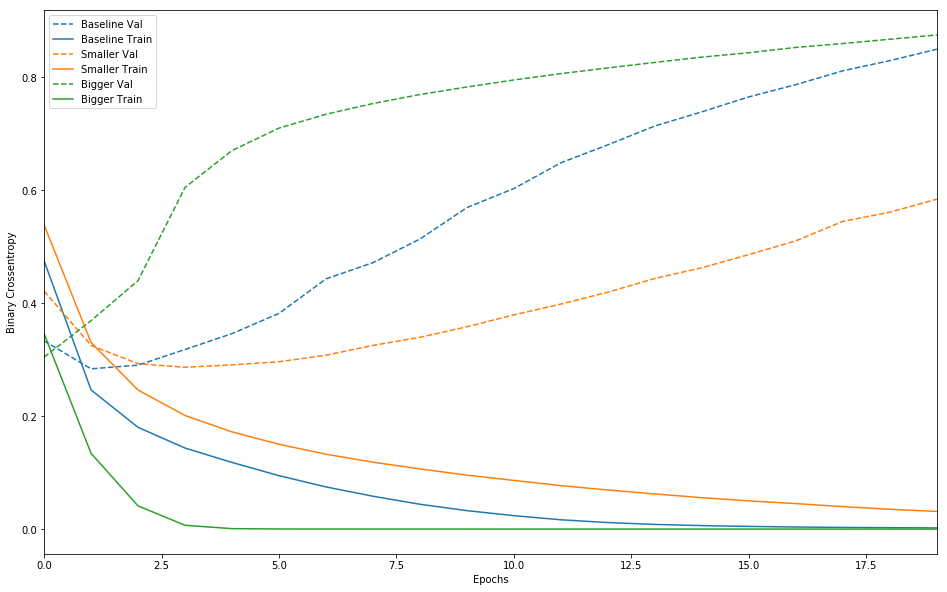

In [11]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
               label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [12]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.5121 - acc: 0.8095 - binary_crossentropy: 0.4696 - val_loss: 0.3750 - val_acc: 0.8792 - val_binary_crossentropy: 0.3299
Epoch 2/20
 - 4s - loss: 0.3027 - acc: 0.9111 - binary_crossentropy: 0.2541 - val_loss: 0.3362 - val_acc: 0.8867 - val_binary_crossentropy: 0.2851
Epoch 3/20
 - 3s - loss: 0.2556 - acc: 0.9296 - binary_crossentropy: 0.2023 - val_loss: 0.3385 - val_acc: 0.8854 - val_binary_crossentropy: 0.2837
Epoch 4/20
 - 3s - loss: 0.2312 - acc: 0.9398 - binary_crossentropy: 0.1751 - val_loss: 0.3499 - val_acc: 0.8826 - val_binary_crossentropy: 0.2928
Epoch 5/20
 - 2s - loss: 0.2186 - acc: 0.9463 - binary_crossentropy: 0.1600 - val_loss: 0.3610 - val_acc: 0.8802 - val_binary_crossentropy: 0.3017
Epoch 6/20
 - 2s - loss: 0.2056 - acc: 0.9513 - binary_crossentropy: 0.1456 - val_loss: 0.3751 - val_acc: 0.8764 - val_binary_crossentropy: 0.3148
Epoch 7/20
 - 2s - loss: 0.1983 - acc: 0.9540 - binary_crossentropy:

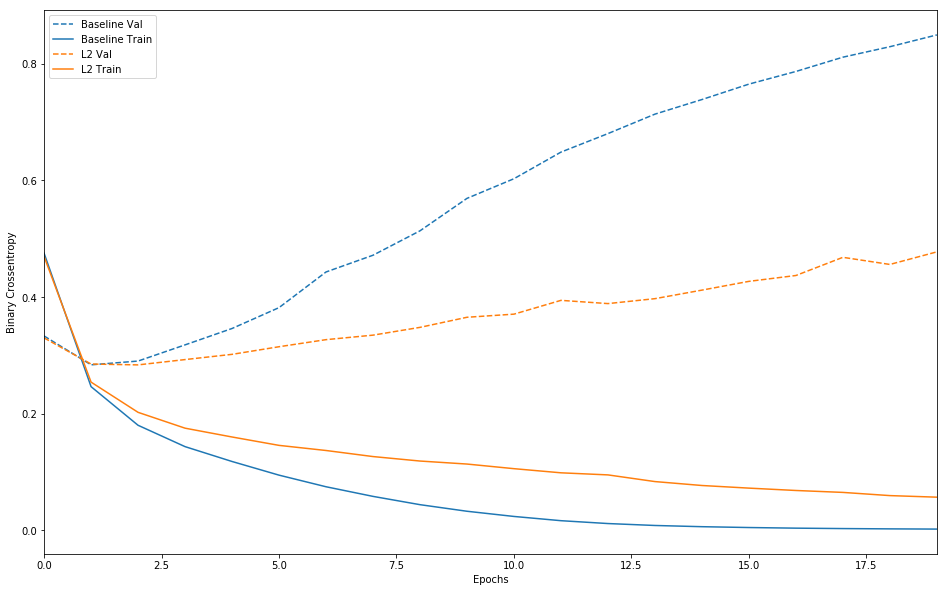

In [13]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [14]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 6s - loss: 0.6110 - acc: 0.6668 - binary_crossentropy: 0.6110 - val_loss: 0.4535 - val_acc: 0.8527 - val_binary_crossentropy: 0.4535
Epoch 2/20
 - 3s - loss: 0.4360 - acc: 0.8215 - binary_crossentropy: 0.4360 - val_loss: 0.3299 - val_acc: 0.8824 - val_binary_crossentropy: 0.3299
Epoch 3/20
 - 2s - loss: 0.3392 - acc: 0.8754 - binary_crossentropy: 0.3392 - val_loss: 0.2883 - val_acc: 0.8880 - val_binary_crossentropy: 0.2883
Epoch 4/20
 - 2s - loss: 0.2819 - acc: 0.9028 - binary_crossentropy: 0.2819 - val_loss: 0.2735 - val_acc: 0.8888 - val_binary_crossentropy: 0.2735
Epoch 5/20
 - 2s - loss: 0.2416 - acc: 0.9186 - binary_crossentropy: 0.2416 - val_loss: 0.2740 - val_acc: 0.8882 - val_binary_crossentropy: 0.2740
Epoch 6/20
 - 2s - loss: 0.2086 - acc: 0.9286 - binary_crossentropy: 0.2086 - val_loss: 0.2877 - val_acc: 0.8854 - val_binary_crossentropy: 0.2877
Epoch 7/20
 - 2s - loss: 0.1810 - acc: 0.9396 - binary_crossentropy:

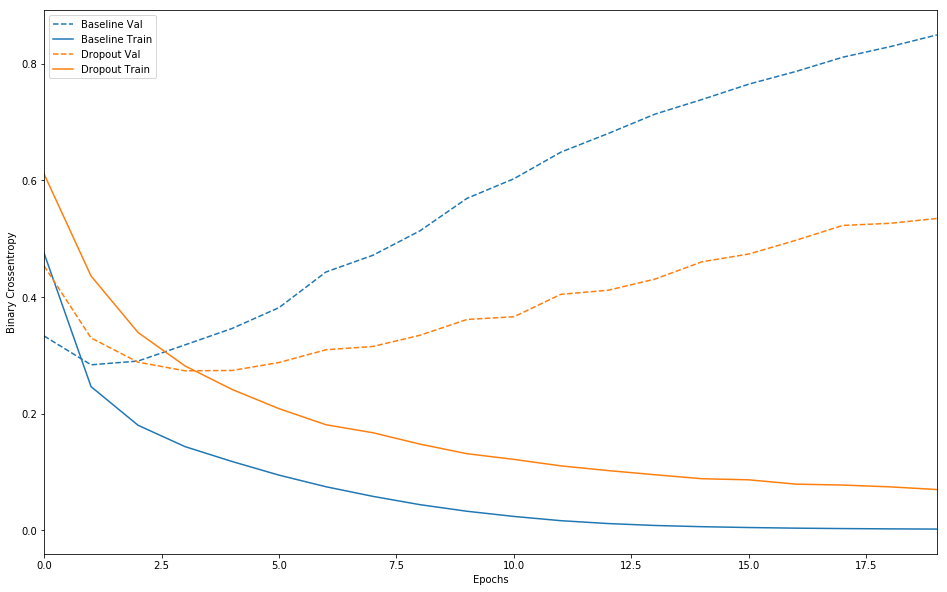

In [15]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])